### Author: Anmol Gandhi

    
#### Predicting Price Range of a Restaurant based on Zomata Restaurant Data 

In [927]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import time
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.model_selection import train_test_split1

### Read the dataset 

In [928]:
data1 = pd.read_csv('./Documents/zomato.csv', encoding='latin-1')

### Exploratory Data Analysis

In [929]:
data1.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [930]:
def replace_values(data1,mask,column_name,value):
    """
    input: data1 ---> DataFrame, mask---> Boolean Series, column_name ---> string, value ---> int
    output: nothing
    
    This function is used to replace the values in the columns with the target value using a conditional statment
    which produces a boolean mask.
    
    """
    data1.loc[mask, column_name] = value

In [931]:
shape = data1.shape
print("This dataset contains "+ str(shape[0])+" rows and "+str(shape[1])+" columns")

This dataset contains 9551 rows and 21 columns


In [932]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
Restaurant ID           9551 non-null int64
Restaurant Name         9551 non-null object
Country Code            9551 non-null int64
City                    9551 non-null object
Address                 9551 non-null object
Locality                9551 non-null object
Locality Verbose        9551 non-null object
Longitude               9551 non-null float64
Latitude                9551 non-null float64
Cuisines                9542 non-null object
Average Cost for two    9551 non-null int64
Currency                9551 non-null object
Has Table booking       9551 non-null object
Has Online delivery     9551 non-null object
Is delivering now       9551 non-null object
Switch to order menu    9551 non-null object
Price range             9551 non-null int64
Aggregate rating        9551 non-null float64
Rating color            9551 non-null object
Rating text             9551 non-null o

In [933]:
data1.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

#### As we can see that only Cuisines has 9 NaN values, rest of the dataset is clean 

In [934]:
data1[["Country Code","Aggregate rating"]].groupby("Country Code").describe()

Aggregate rating                                               \
                        count      mean       std  min    25%   50%    75%   
Country Code                                                                 
1                      8652.0  2.523324  1.510986  0.0  2.100  3.10  3.600   
14                       24.0  3.658333  0.523298  2.4  3.500  3.70  3.875   
30                       60.0  3.763333  1.253195  0.0  3.600  4.15  4.500   
37                        4.0  3.575000  0.561991  3.0  3.225  3.50  3.850   
94                       21.0  4.295238  0.428341  3.4  4.000  4.30  4.600   
148                      40.0  4.262500  0.433050  2.3  4.100  4.30  4.500   
162                      22.0  4.468182  0.345566  3.6  4.225  4.50  4.800   
166                      20.0  4.060000  0.418519  3.4  3.800  4.00  4.325   
184                      20.0  3.575000  0.390512  3.0  3.200  3.75  3.900   
189                      60.0  4.210000  0.331765  3.4  4.000  4.20  4.400   
191                      20.0  3.870000  0.590361  2.4  3.675  4.00  4.200   
208                      34.0  4.300000  0.347284  3.4  4.200  4.30  4.500   
214                      60.0  4.233333  0.421726  2.4  4.000  4.25  4.500   
215                      80.0  4.087500  0.633331  0.0  3.875  4.10  4.500   
216                     434.0  4.004378  0.527230  0.0  3.700  4.00  4.300   

                   
              max  
Country Code       
1             4.9  
14            4.6  
30            4.9  
37            4.3  
94            4.9  
148           4.9  
162           4.9  
166           4.9  
184           4.2  
189           4.9  
191           4.9  
208           4.9  
214           4.9  
215           4.9  
216           4.9

#### I performed some groupby function to describe the aggregate rating grouping the country code column, Surprisingly we can only see that the whole dataset in dominated by the country code 1 but also has some values for country code 216

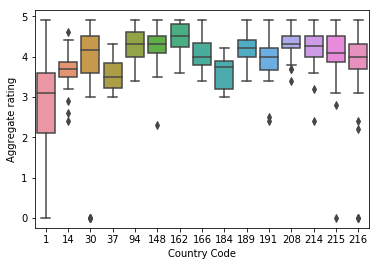

In [935]:
sns.boxplot(data1["Country Code"],data1["Aggregate rating"])

#### Further to understand more about country code and aggregate rating i did some visualisation in which i plotted a boxpot for every country code and now its evident that Country code 1 is the maximum, my initial assumption is country code 1 is india as Zomato is an indian company

In [936]:
# We only keep data with country code 1 and remove the column Country Code and Currency as all rows now represents 
# the same country


data1 = data1[data1["Country Code"] == 1]
data1 = data1.drop(["Country Code","Currency"],1)

In [937]:
data1[["Rating color","Aggregate rating"]].groupby("Rating color").describe()

Aggregate rating                                             
                        count      mean       std  min  25%  50%  75%  max
Rating color                                                              
Dark Green              116.0  4.646552  0.142908  4.5  4.5  4.6  4.7  4.9
Green                   692.0  4.153324  0.131903  4.0  4.0  4.1  4.3  4.4
Orange                 3678.0  3.048722  0.251235  2.5  2.9  3.1  3.3  3.4
Red                     180.0  2.296111  0.127004  1.8  2.2  2.3  2.4  2.4
White                  2139.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Yellow                 1847.0  3.677423  0.139665  3.5  3.6  3.7  3.8  3.9

#### Now I perform the groupby on Rating color to see how the Aggregate rating is described in the data, as we can see there are around 2139 restaurants which are not rated resetaurants and hence decide not to include thme in the analysis

In [938]:
data1 = data1[data1["Aggregate rating"] > 0]

### Feature Engineering

#### Now i want to check if the length of the name of the restaurant influence the data in any sort

In [939]:
data1["length"] = data1["Restaurant Name"].apply(len)

(array([ 739., 1960., 2059.,  954.,  427.,  239.,   80.,   35.,   13.,
           7.]),
 array([ 2. ,  7.2, 12.4, 17.6, 22.8, 28. , 33.2, 38.4, 43.6, 48.8, 54. ]),
 <a list of 10 Patch objects>)

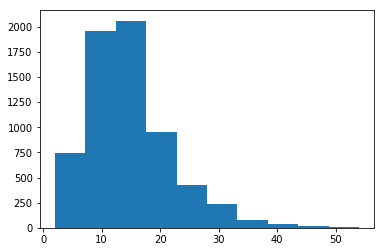

In [940]:
#### Here we can see that most of the restaurants and names around 10-15 characters longh

plt.hist(data1.length)

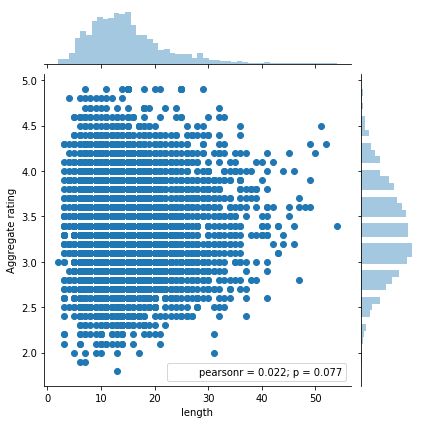

In [941]:
sns.jointplot(x=data1.length, y=data1["Aggregate rating"], data=data1);

#### Here we can see that there is not much influence of the length of text to the aggregate rating

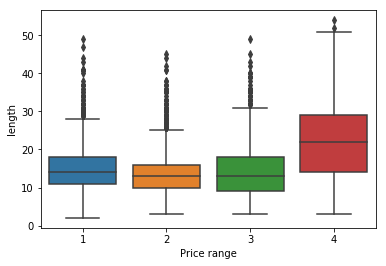

In [942]:
sns.boxplot(x=data1["Price range"], y=data1.length, data=data1);

#### As we can see for price range 1,2,3 it the length lies between 10-20 while price range 4 is more distributed from 15-30 character, there lies some corelation but not much influence

In [943]:
### Here i want to extract how manu cuisines does the restaurant serve and this will help us to determine any relation 
### between price range and number of cuisines
data1["Number of Cuisines"] = data1.Cuisines.apply(lambda X: len(X.split()))

(array([4343., 1638.,  443.,   52.,   37.]),
 array([ 1. ,  3.2,  5.4,  7.6,  9.8, 12. ]),
 <a list of 5 Patch objects>)

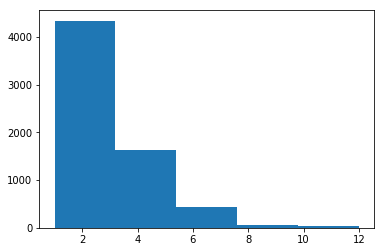

In [944]:
plt.hist(data1["Number of Cuisines"],bins =5)

#### As we can see the data looks to be a bit right skewed and peaks at 1-3  that means most of the restaurants serve just 1-3 cuisines 

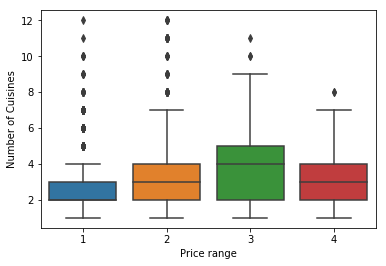

In [945]:
sns.boxplot(x=data1["Price range"], y=data1["Number of Cuisines"], data=data1);

In [946]:
data1[["Number of Cuisines","Aggregate rating"]].groupby("Number of Cuisines").describe()

Aggregate rating                                       \
                              count      mean       std  min   25%   50%   
Number of Cuisines                                                         
1                             927.0  3.337756  0.461309  2.0  3.00  3.30   
2                            1520.0  3.366579  0.481728  2.0  3.00  3.30   
3                            1896.0  3.286551  0.501747  1.8  2.90  3.30   
4                            1090.0  3.391651  0.534841  2.0  3.00  3.40   
5                             548.0  3.449088  0.521020  2.0  3.10  3.50   
6                             329.0  3.367477  0.530824  1.9  3.00  3.40   
7                             114.0  3.486842  0.550062  2.0  3.10  3.50   
8                              37.0  3.359459  0.615747  2.4  2.80  3.40   
9                              15.0  3.126667  0.652979  2.5  2.65  2.90   
10                             12.0  3.175000  0.597152  2.1  2.85  3.35   
11                             18.0  3.477778  0.370303  2.5  3.35  3.60   
12                              7.0  3.557143  0.171825  3.4  3.40  3.50   

                                
                      75%  max  
Number of Cuisines              
1                   3.700  4.7  
2                   3.700  4.9  
3                   3.600  4.9  
4                   3.800  4.9  
5                   3.800  4.9  
6                   3.800  4.7  
7                   3.900  4.7  
8                   3.900  4.4  
9                   3.350  4.5  
10                  3.575  3.9  
11                  3.675  4.0  
12                  3.700  3.8

In [947]:

# define the number of kilometers in one radian
kms_per_radian = 6371.0088
# represent points consistently as (lat, lon)
coords = data1[["Latitude","Longitude"]]
# define epsilon as 1.5 kilometers, converted to radians for use by haversine
epsilon = 1 / kms_per_radian

start_time = time.time()
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_

# get the number of clusters
num_clusters = len(set(cluster_labels))

# all done, print the outcome
message = 'Clustered {:,} points down to {:,} clusters, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(data1), num_clusters, 100*(1 - float(num_clusters) / len(data1)), time.time()-start_time))

Clustered 6,513 points down to 294 clusters, for 95.5% compression in 0.21 seconds


### Here we are clsutering all locations which are nearby using DBSCAN clustering technical by which we can avoid using the columns Lat and Lon and just have an additional new column called clusters which has the Cluster labels

In [948]:
data1["Cluster"] = cluster_labels


In [949]:
###Dropping these columns as they were used to make new features by feature engineering

data1 = data1.drop(["Latitude","Longitude","Cuisines","Address","Locality Verbose"],1)

In [950]:
data1.columns

Index(['Restaurant ID', 'Restaurant Name', 'City', 'Locality',
       'Average Cost for two', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes', 'length',
       'Number of Cuisines', 'Cluster'],
      dtype='object')

In [951]:
data1 = data1.drop(["Restaurant ID","Switch to order menu","Rating color","Restaurant Name"],1)

In [952]:
### making a new feature by just including the area name from the address of the city 

data1["Locality"] = data1["Locality"].apply(lambda x: x.split(",")[-1] if len(x.split(","))>1 else x)

In [953]:
### Comverting the columns with Yes and No into Zeros and ones making it ordinal

mapping = {"No":0, "Yes":1}
data1["Has Table booking"].replace(mapping, inplace=True)
data1["Has Online delivery"].replace(mapping, inplace=True)
data1["Is delivering now"].replace(mapping, inplace=True)


In [954]:
data1.head()

,City,Locality,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,length,Number of Cuisines,Cluster
624,Agra,Agra Cantt,850,0,0,0,3,3.9,Good,140,10,3,0
625,Agra,Agra Cantt,700,0,0,0,2,3.5,Good,71,19,3,1
626,Agra,Agra Cantt,500,0,0,0,2,3.6,Good,94,23,2,0
627,Agra,Civil Lines,400,0,0,0,2,4.0,Very Good,87,37,1,2
628,Agra,Civil Lines,1000,0,0,0,3,4.2,Very Good,177,14,4,3


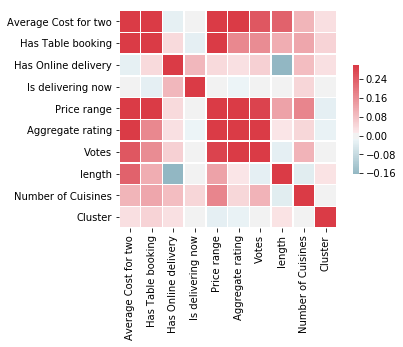

In [955]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data1.corr(),  cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Using the heatmap to understand if there can be any more features generated which are co-related to each other

In [956]:
data1 = data1[data1["Average Cost for two"] != 0]

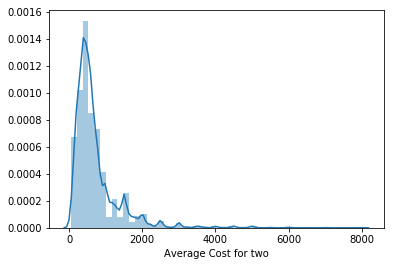

In [957]:
sns.distplot(data1["Average Cost for two"])

### Seeing the distribution of the column Average cost for two we come to know that the distribution is right skewed, next applying log transformation we try to make it simillar to normal distribution

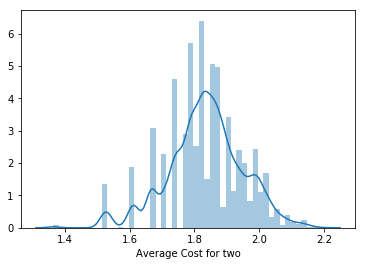

In [958]:
sns.distplot(np.log(Y["Average Cost for two"]))

In [960]:
data1["Average Cost for two"] = np.log(data1["Average Cost for two"])

### Data Modeling

In [961]:
def convert_category(column_name):
    """
    input: column_name ---> string
    output: none
    
    This function converts an string series into ordinal series
    """
    data1[column_name] = data1[column_name].astype("category")
    data1[column_name]= data1[column_name].cat.codes

In [834]:
convert_category("Rating text")
convert_category("City")
convert_category("Locality")

In [835]:
X = data1["Price range"]
Y = data1.drop(["Price range"],1)

In [839]:
X_train, X_test, y_train, y_test = train_test_split(Y, X, train_size=0.8, random_state=42)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [840]:
models = [ExtraTreesClassifier(),GaussianNB(),RandomForestClassifier(random_state = 0),LogisticRegression(),
         GradientBoostingClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()]
x = []
for model in models:
    model.fit(X_train,y_train)
    x.append(model.score(X_test,y_test)*100)

In [841]:
model = pd.DataFrame(["ExtraTreesClassifier","GaussianNB","RandomForestClassifier","LogisticRegression",
         "GradientBoostingClassifier","DecisionTreeClassifier","KNeighborsClassifier"],columns = ["Model"])
model["Scores"] = x
model.sort_values(by = "Scores",ascending=False)

,Model,Scores
4,GradientBoostingClassifier,97.770945
5,DecisionTreeClassifier,97.617218
2,RandomForestClassifier,95.772483
0,ExtraTreesClassifier,93.159108
3,LogisticRegression,77.248271
1,GaussianNB,60.261337
6,KNeighborsClassifier,52.344350


#### As we can see GradientBoostingClassifer has the highest accuracy and we will use the same for prediction of price range

In [842]:
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[497   0   0   0]
 [  5 512   0   0]
 [  0  12 206   1]
 [  0   0  11  57]]


             precision    recall  f1-score   support

          1       0.99      1.00      0.99       497
          2       0.98      0.99      0.98       517
          3       0.95      0.94      0.94       219
          4       0.98      0.84      0.90        68

avg / total       0.98      0.98      0.98      1301

